In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [7]:
test_data = pd.read_csv('data/pokemon_df_rf.csv')

In [6]:
test_data

,Winner_mark,Generation_first,Legendary_first,Generation_second,Legendary_second,HP_diff,Attack_diff,Defense_diff,Sp. Atk_diff,Sp. Def_diff,Speed_diff
0,2,2,0,3,0,-20,-6,10,-15,10,-19
1,2,5,1,5,1,0,-39,-18,18,39,0
2,2,2,0,5,0,-20,-35,10,-45,10,0
3,2,2,0,5,0,-37,-80,-50,10,-50,-28
4,1,1,0,2,0,50,50,-105,105,-160,50
...,...,...,...,...,...,...,...,...,...,...,...
49995,1,5,1,1,0,70,80,30,80,95,30
49996,1,5,0,5,0,25,30,0,-15,5,8
49997,2,3,0,3,0,-13,-65,40,25,10,-25
49998,1,1,0,1,0,15,-5,-20,-40,0,55


In [8]:
X = test_data.drop('Winner_mark',axis=1)
y = test_data['Winner_mark']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=1)

In [1]:
#svc pipeline

In [17]:
pipeline_svc = Pipeline([('scaler',StandardScaler()),('svc',SVC())],verbose=True)

In [19]:
param_grid = {
    'kernel':['rbf','linear'],
    'svc_C' : [0.001,0.01,0.1,1],
    'svc_gamma':[0.001,0.01,0.1,1,10]
}
gs_svc = GridSearchCV(pipeline_svc,
                   param_grid = param_grid,
                   scoring = 'accuracy',
                   cv = 3,
                   n_jobs=-1)
gs_svc.fit(X_train)
pred_train_svc = gs_svc.predict(X_train)
pred_test_svc = gs_svc.predict(X_test)

accuracy_score(y_train, pred_train_svc), accuracy_score(y_test, pred_test_svc)

KeyboardInterrupt: 

In [ ]:
# knn_pipeline

In [26]:
pipeline_knn = Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier())])

In [27]:
param_grid = {
    'knn_k' : range(1,21),
}
gs_knn = GridSearchCV(pipeline_knn,
                   param_grid = param_grid,
                   scoring = 'accuracy',
                   cv = 3,
                   n_jobs=-1)
gs_knn.fit(X_train,y_train)
pred_train_knn = gs_knn.predict(X_train)
pred_test_knn = gs_knn.predict(X_test)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

KeyboardInterrupt: 

In [ ]:
# Decisiontree_pipeline

In [34]:
tree = DecisionTreeClassifier()

param_grid={
    'max_depth': [],
    'max_leaf_nodes': [],
    'random_state' :[1]
}
gs_tree = GridSearchCV(tree,
                      param_grid = param_grid, 
                      scoring = 'accuracy',                          
                      cv= 3,
                      n_jobs = -1)

In [35]:
gs_tree.fit(X_train,y_train)
pred_train_tree = gs_tree.predict(X_train)
pred_test_tree = gs_tree.predict(X_test)
accuracy_score(y_train,pred_train_tree)

0.9456

In [36]:
best_tree = gs_tree.best_estimator_
fi = best_tree.feature_importances_
fi_s = pd.Series(fi, index=X_train.columns)
fi_s.sort_values(ascending=False)

Speed_diff           0.970223
Attack_diff          0.017990
HP_diff              0.005058
Defense_diff         0.004620
Sp. Atk_diff         0.000974
Generation_first     0.000386
Legendary_second     0.000376
Generation_second    0.000373
Sp. Def_diff         0.000000
Legendary_first      0.000000
dtype: float64

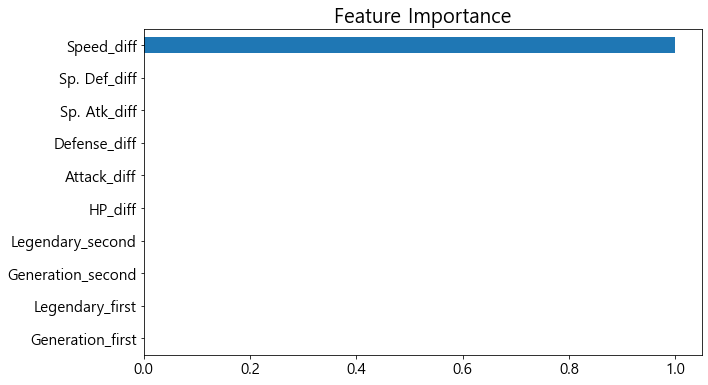

In [33]:
import matplotlib.pyplot as plt
fi_s.sort_values().plot(kind='barh',figsize=(10,6))
plt.title('Feature Importance')
plt.show()

In [ ]:
# RandomForest_pipeline

In [41]:
param_grid={
    'n_estimators': [10],
    'max_leaf_nodes': [1,50,60],
    'random_state' :[1]
}
rf = RandomForestClassifier(random_state=1)
gs_rf = GridSearchCV(rf,
                    param_grid=param_grid,
                    scoring = 'accuracy',
                    cv = 3 ,
                    n_jobs=-1)

In [42]:
gs_rf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_leaf_nodes': [1, 50, 60], 'n_estimators': [10],
                         'random_state': [1]},
             scoring='accuracy')

In [44]:
pred_train_rf = gs_rf.predict(X_train)
pred_test_rf = gs_rf.predict(X_test)
accuracy_score(y_train,pred_train_rf),accuracy_score(y_test,pred_test_rf)

(0.94424, 0.9464)

In [45]:
best_tree_rf = gs_rf.best_estimator_
fi = best_tree_rf.feature_importances_
fi_s = pd.Series(fi, index=X_train.columns)
fi_s.sort_values(ascending=False)

Speed_diff           0.843193
Attack_diff          0.056824
Sp. Atk_diff         0.046247
HP_diff              0.024738
Sp. Def_diff         0.009755
Legendary_first      0.008366
Defense_diff         0.005432
Legendary_second     0.002422
Generation_second    0.001702
Generation_first     0.001320
dtype: float64

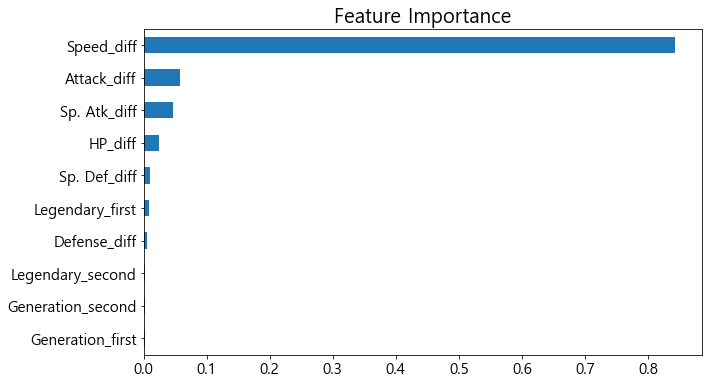

In [46]:
import matplotlib.pyplot as plt
fi_s.sort_values().plot(kind='barh',figsize=(10,6))
plt.title('Feature Importance')
plt.show()